In [ ]:
import pandas as pd

# Load the CSV
df = pd.read_csv("Personal_Finance_Dataset.csv")

# Show the first 5 rows
print(df.head())

# Check for null values and data types
print(df.info())


In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing values in important columns
df.dropna(subset=['Date', 'Amount', 'Type'], inplace=True)

# Standardize 'Type' column to have consistent values
df['Type'] = df['Type'].str.strip().str.capitalize()

# Confirm cleanup
print(df.info())
print(df['Type'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     1500 non-null   datetime64[ns]
 1   Transaction Description  1500 non-null   object        
 2   Category                 1500 non-null   object        
 3   Amount                   1500 non-null   float64       
 4   Type                     1500 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 58.7+ KB
None
Type
Expense    1222
Income      278
Name: count, dtype: int64


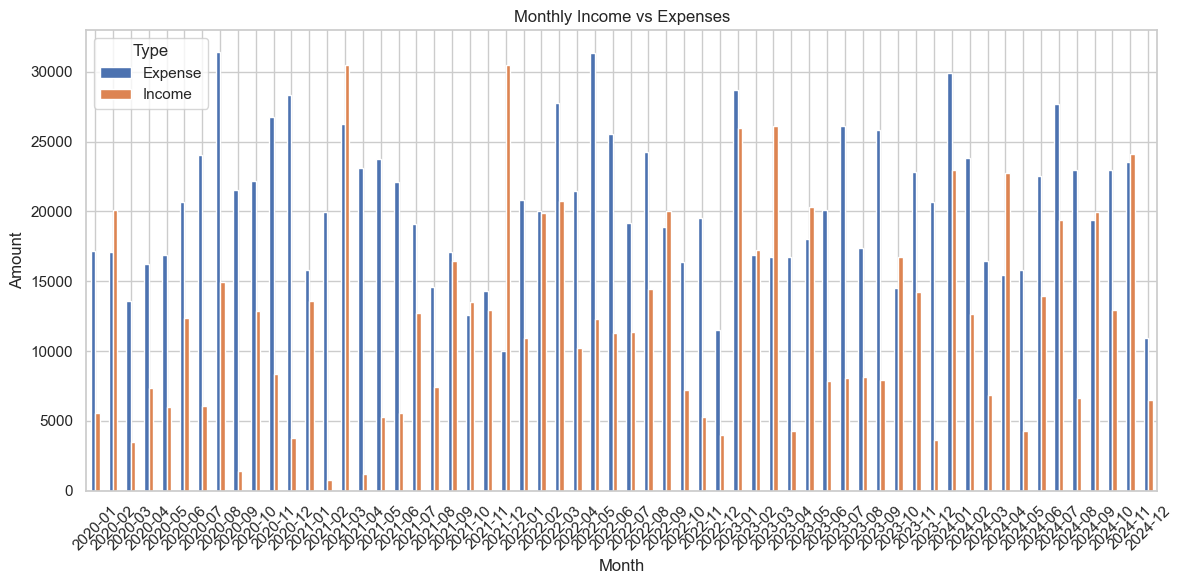

C:\Users\HP\AppData\Local\Temp\ipykernel_22160\1136376868.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_summary.values, y=category_summary.index, palette='rocket')


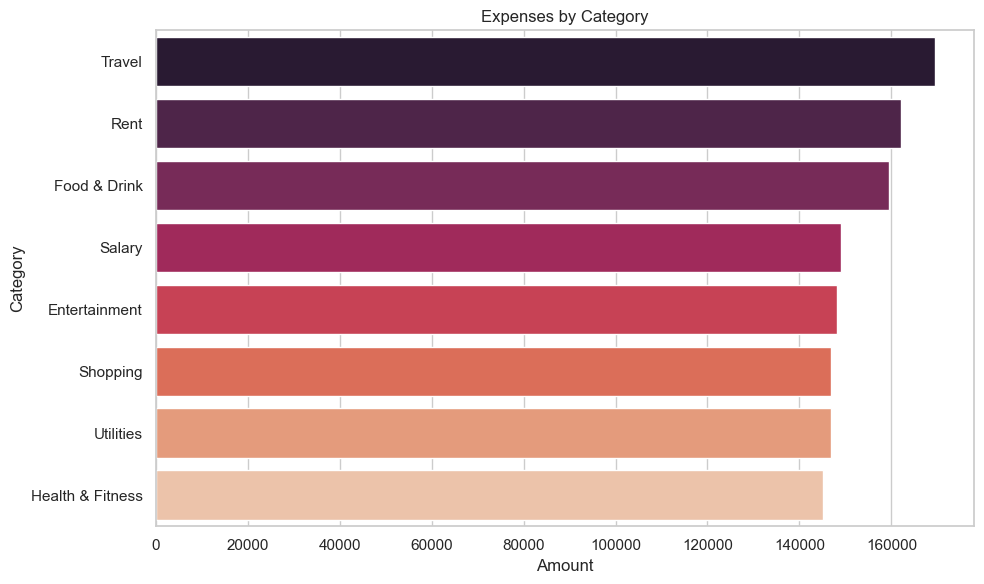

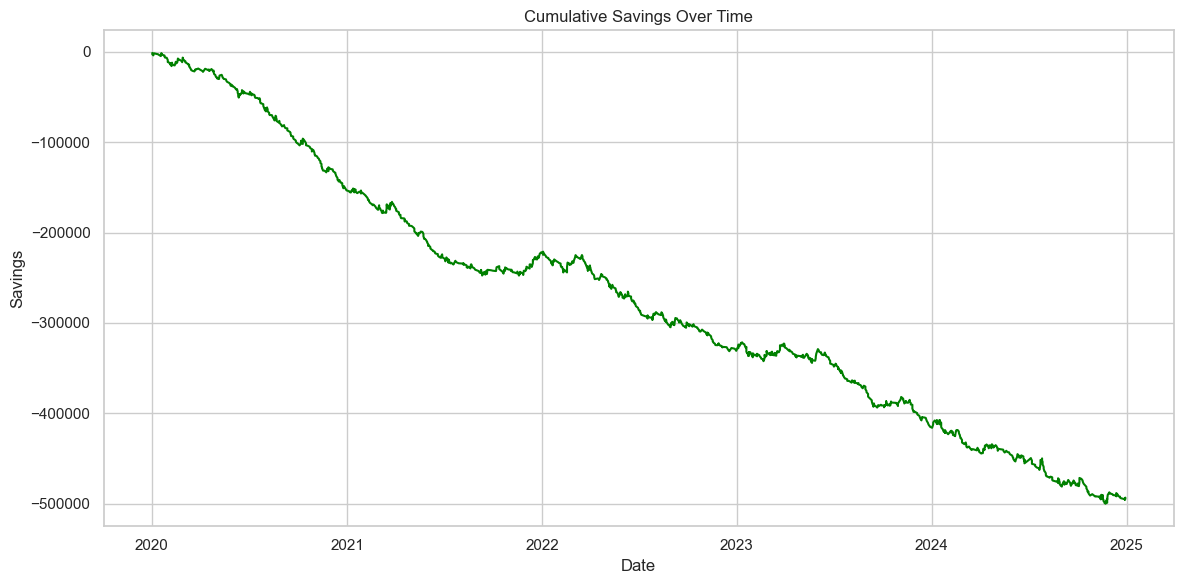

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# 1. Monthly Income vs Expenses
df['Month'] = df['Date'].dt.to_period('M').astype(str)
monthly_summary = df.groupby(['Month', 'Type'])['Amount'].sum().unstack().fillna(0)

monthly_summary.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title('Monthly Income vs Expenses')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Category-wise Expense Breakdown
expense_df = df[df['Type'] == 'Expense']
category_summary = expense_df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=category_summary.values, y=category_summary.index, palette='rocket')
plt.title('Expenses by Category')
plt.xlabel('Amount')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# 3. Cumulative Savings Over Time
df['Net'] = df['Amount'].where(df['Type'] == 'Income', -df['Amount'])
df_sorted = df.sort_values('Date')
df_sorted['Cumulative_Savings'] = df_sorted['Net'].cumsum()

plt.figure(figsize=(12,6))
plt.plot(df_sorted['Date'], df_sorted['Cumulative_Savings'], color='green')
plt.title('Cumulative Savings Over Time')
plt.xlabel('Date')
plt.ylabel('Savings')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Summary statistics
total_income = df[df['Type'] == 'Income']['Amount'].sum()
total_expense = df[df['Type'] == 'Expense']['Amount'].sum()
total_savings = total_income - total_expense
top_expense_category = expense_df.groupby('Category')['Amount'].sum().idxmax()
top_expense_amount = expense_df.groupby('Category')['Amount'].sum().max()

print("💡 Financial Summary")
print(f"Total Income: {total_income}")
print(f"Total Expense: {total_expense}")
print(f"Net Savings: {total_savings}")
print(f"Top Expense Category: {top_expense_category} - {top_expense_amount}")


💡 Financial Summary
Total Income: 734087.0
Total Expense: 1227194.37
Net Savings: -493107.3700000001
Top Expense Category: Travel - 169497.79


In [ ]:
# Save the cleaned and processed data for future use
df_sorted.to_csv("Cleaned_Personal_Finance.csv", index=False)


In [ ]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.
